# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count+1} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | takayama
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | porto walter
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | pangody
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | xichang
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | fort nelson
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | saint-leu
Processing Record 21 of Set 1 | bajo baudo
City not found. Skipping...
Processing Recor

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,298.03,69,74,3.05,PF,1681176575
1,bluff,-46.6000,168.3333,284.71,96,100,7.68,NZ,1681176575
2,takayama,36.1333,137.2500,289.28,53,0,2.98,JP,1681176575
3,souillac,-20.5167,57.5167,298.36,94,75,2.06,MU,1681176575
4,albany,42.6001,-73.9662,284.75,44,0,1.98,US,1681176576


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,298.03,69,74,3.05,PF,1681176575
1,bluff,-46.6000,168.3333,284.71,96,100,7.68,NZ,1681176575
2,takayama,36.1333,137.2500,289.28,53,0,2.98,JP,1681176575
3,souillac,-20.5167,57.5167,298.36,94,75,2.06,MU,1681176575
4,albany,42.6001,-73.9662,284.75,44,0,1.98,US,1681176576


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

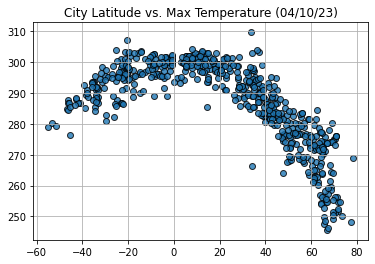

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

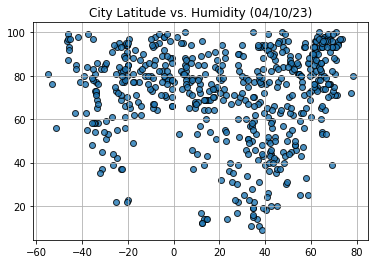

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

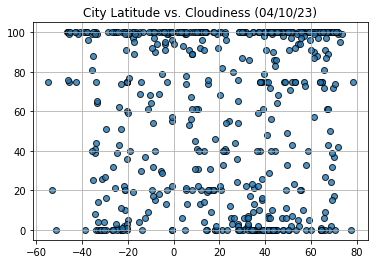

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

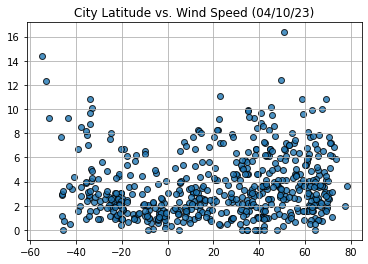

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots for each relationship above 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
                
        # Annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
        
        return r_value




In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,takayama,36.1333,137.2500,289.28,53,0,2.98,JP,1681176575
4,albany,42.6001,-73.9662,284.75,44,0,1.98,US,1681176576
9,ixtapa,20.7000,-105.2000,298.28,78,20,4.12,MX,1681176577
10,saint george,37.1041,-113.5841,303.48,11,0,2.06,US,1681176577
11,pangody,65.8500,74.4859,247.58,94,81,3.62,RU,1681176577


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,298.03,69,74,3.05,PF,1681176575
1,bluff,-46.6000,168.3333,284.71,96,100,7.68,NZ,1681176575
3,souillac,-20.5167,57.5167,298.36,94,75,2.06,MU,1681176575
5,porto walter,-8.2686,-72.7439,295.63,98,15,0.99,BR,1681176576
6,new norfolk,-42.7826,147.0587,288.10,85,100,0.46,AU,1681176576


###  Temperature vs. Latitude Linear Regression Plot

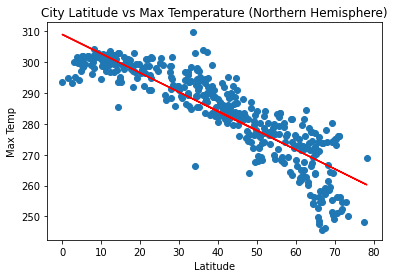

The r-value is: -0.8747073007308285


In [44]:
# Linear regression on Northern Hemisphere for temperature vs latitude and create a scatter plot with the linear regression line
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Max Temperature (Northern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")


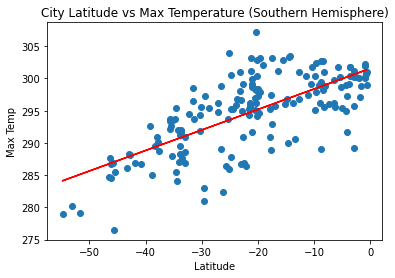

0.7018420421451004

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'City Latitude vs Max Temperature (Southern Hemisphere)', 'Max Temp', (-50,90))

**Discussion about the linear relationship:** There is a relatively strong negative correlation between the latitude and temperaturefor the Northern Hemisphere and a positive correlation for the Southern Hemisphere. Visualizing the linear relationship between the two clearly indicates that the temperature decreases as we move further away from the equator. 

### Humidity vs. Latitude Linear Regression Plot

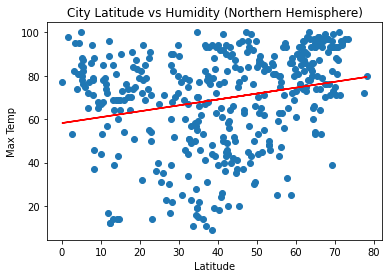

The r-value is: 0.23966235525281437


In [46]:
# Northern Hemisphere - humidity (%) vs. latitude regression plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Humidity (Northern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

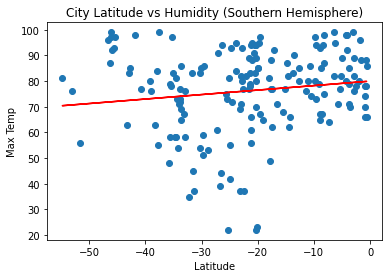

The r-value is: 0.14058651669464187


In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Humidity (Southern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Although there is a positive correlation between Humidity and Latitude in the Northern and Southern Hemispheres, these are very weak correlations. 

### Cloudiness vs. Latitude Linear Regression Plot

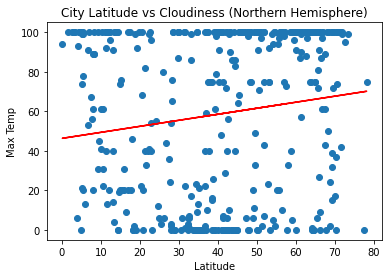

The r-value is: 0.14756662731692008


In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Cloudiness (Northern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

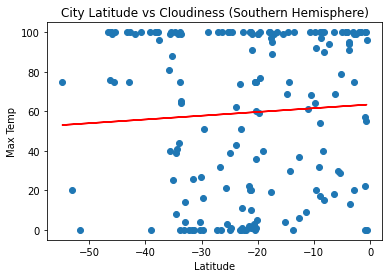

The r-value is: 0.06284304808679658


In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Cloudiness (Southern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** The positive correlation between Cloudiness and Latitude for both the Northern and Southern hemispheres are very small indicating a weak relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

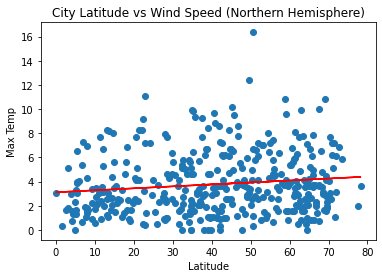

The r-value is: 0.1277301664033595


In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Wind Speed (Northern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

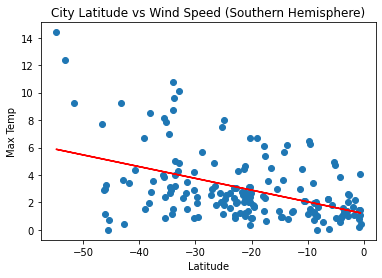

The r-value is: -0.4523361754027693


In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
r_value = plot_linear_regression(x_values, y_values, 'City Latitude vs Wind Speed (Southern Hemisphere)', 'Max Temp', (10,40))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a positive correlations between wind speed and latitude in the northern hemisphere but this relationship is weak. On the other hand, there is a stronger negative correlation in the Southern Hemisphere indicating that the wind speed is likely to get faster as we move further south from the equator. 